In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [2]:
df = pd.read_csv(r"C:\Users\Honey\Desktop\Machine_Learning_Algorithms\Datasets\Admission_Prediction.csv")
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [3]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [4]:
df["GRE Score"].fillna(df["GRE Score"].mean(),inplace=True)
df["TOEFL Score"].fillna(df["TOEFL Score"].mean(),inplace=True)
df["University Rating"].fillna(df["University Rating"].mode()[0],inplace=True)
df.drop("Serial No.",axis=1,inplace=True)

In [5]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


C:\Users\Honey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Honey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Honey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

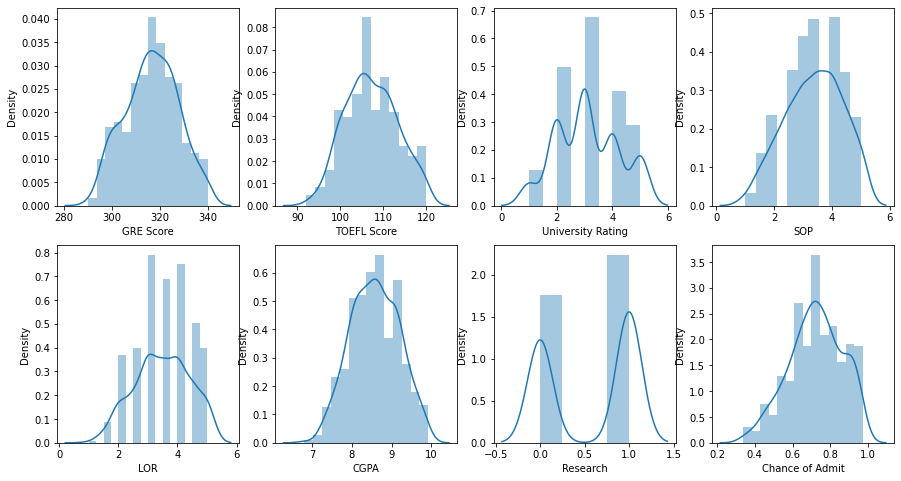

In [6]:
plotnumber = 1
plt.figure(figsize=(15,8))
for column in df.columns:
    plt.subplot(2,4,plotnumber)
    sns.distplot(df[column])
    plotnumber+=1

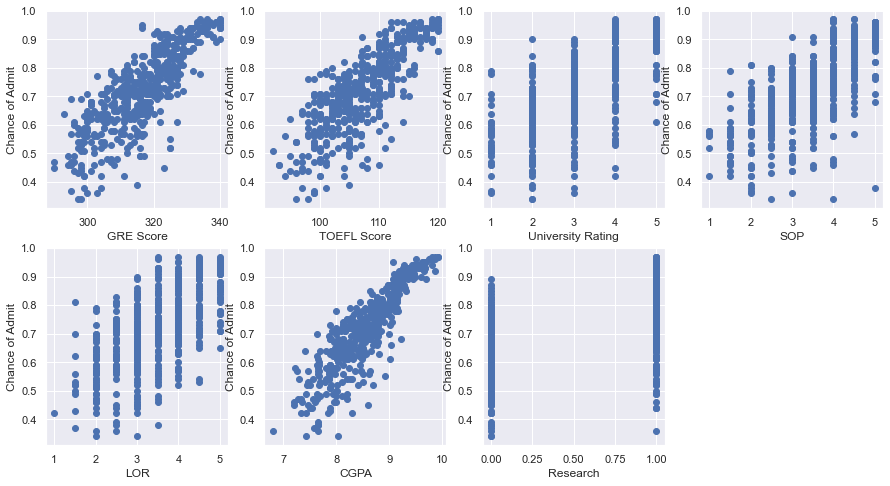

In [10]:
X = df.drop("Chance of Admit",axis=1)
y = df["Chance of Admit"]
plt.figure(figsize=(15,8))
plotnumber=1
for column in X.columns:
    plt.subplot(2,4,plotnumber)
    plt.scatter(X[column],y)
    plt.xlabel(column)
    plt.ylabel("Chance of Admit")
    plotnumber+=1

In [14]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [40]:
X_scaled.shape

(500, 7)

In [43]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [44]:
vif

,Features,VIF
0,GRE Score,4.152735
1,TOEFL Score,3.793345
2,University Rating,2.517272
3,SOP,2.776393
4,LOR,2.037449
5,CGPA,4.654369
6,Research,1.459411


In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=355)
linear = LinearRegression()
linear.fit(x_train,y_train)

filename = "Admission Prediction.pickle"
pickle.dump(linear,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(scalar.transform([[300,110,5,5,5,10,1]]))

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.92190162])

In [63]:
linear.score(x_train,y_train)

0.8415250484247909

In [64]:
linear.score(x_test,y_test)

0.7534898831471066

In [84]:
lasso_cv = LassoCV(alphas=None,cv=10,max_iter=100000)
lasso_cv.fit(x_train,y_train)
alpha = lasso_cv.alpha_
lasso_model = Lasso(alpha)
lasso_model.fit(x_train,y_train)
lasso_model.score(x_test,y_test)

0.7530347684111502

In [86]:
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridge_cv = RidgeCV(alphas=alphas,cv=10)
ridge_cv.fit(x_train,y_train)
alpha = ridge_cv.alpha_
ridge_model = Ridge(alpha)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.7571204377864393

In [88]:
elastic_cv = ElasticNetCV(alphas=None,cv=10)
elastic_cv.fit(x_train,y_train)
alpha = elastic_cv.alpha_
elastic_cv.l1_ratio
elastic_model = ElasticNet(alpha=alpha)
elastic_model.fit(x_train,y_train)
elastic_model.score(x_test,y_test)

0.7531695370639868